# Conceptos Básicos
##### Adaptado de  **[Interpretable Machine Learning with Python](https://www.packtpub.com/product/interpretable-machine-learning-with-python/9781800203907)** por  Serg Masís, published by Packt

## Preparaciones


### Instalación de Librerias


In [1]:
#!pip install --upgrade pandas numpy statsmodels scikit-learn matplotlib --user

In [2]:
#!pip install --upgrade machine-learning-datasets --user

In [3]:
#!pip install --upgrade machine-learning-datasets
#!pip install --upgrade rulefit interpret skope-rules
#!pip install --no-deps git+https://github.com/maxfrenzel/CompressionVAE.git

### Cargar Librarias

In [2]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
from rulefit import RuleFit
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC
import seaborn as sns

In [4]:
import sys
#Next two lines of code only needed while CVAE 
#remains incompatible to Tensorflow 2.2+
import tensorflow.compat.v1 as tf
sys.modules['tensorflow'] = tf
from cvae import cvae
#Next two lines of code only needed while SkopedRules
#remains incompatible to Sklearn 0.23.0+
import six
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

### Entendimiento y Preparacion de datos


In [5]:
cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\cardio_train.csv
1 dataset files found in C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data folder
parsing C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\cardio_train.csv


In [6]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


- age_: Del paciente en días (Característica objetiva)
- height_: En centímetros (Característica objetiva)
- weight_: En kg (Característica objetivo)
- gender_: Un binario donde 1: mujer, 2: hombre (Característica objetiva)
- ap_hi_: presión arterial sistólica, que es la presión arterial ejercida cuando
la sangre se expulsa durante la contracción ventricular. Valor normal: <120 mmHg
(Función de examen)
- ap_lo_: presión arterial diastólica, que es la presión arterial entre
latidos del corazón. Valor normal: <80 mmHg (función de examen)
- colesterol: un ordinal donde 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
(Función de examen)
- gluc_: un ordinal donde 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
(Función de examen)
- smoke_: Un binario donde 0: no fumador, 1: fumador (Característica subjetiva)
- alco_: Un binario donde 0: no bebedor, 1: bebedor (Característica subjetiva)
- active_: Un binario donde 0: no activo, 1: activo (Característica subjetiva)
- cardio_: un binario donde 0: sin CVD, 1: tiene CVD (función de destino)

#### Prepración de Datos


In [7]:
cvd_df['age'] =  cvd_df['age'] / 365.24

In [8]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


In [9]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [10]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

In [11]:
X_train.shape

(58404, 11)

## Tipos y Metodos de Interpretación de Modelos

In [12]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.190     
Dependent Variable: cardio           AIC:              65618.3485
Date:               2021-10-01 08:36 BIC:              65726.0502
No. Observations:   58404            Log-Likelihood:   -32797.   
Df Model:           11               LL-Null:          -40481.   
Df Residuals:       58392            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [13]:
np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.637374
ap_hi          1.057676
age            1.052357
weight         1.011129
ap_lo          1.010573
height         0.996389
gender         0.977519
gluc           0.890913
smoke          0.877576
alco           0.814627
active         0.806471
const          0.000014
dtype: float64

In [14]:
np.std(X_train, 0)

age             6.757537
gender          0.476697
height          8.186987
weight         14.335173
ap_hi          16.703572
ap_lo           9.547583
cholesterol     0.678878
gluc            0.571231
smoke           0.283629
alco            0.225483
active          0.397215
dtype: float64

In [15]:
coefs = log_result.params.drop(labels=['const','gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.936632
age            0.344855
cholesterol    0.334750
weight         0.158651
ap_lo          0.100419
active         0.085436
gluc           0.065982
alco           0.046230
smoke          0.037040
height         0.029620
dtype: float64

### Interpretación Individual con una Regresión Logistica

In [16]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
print(y_pred)

[0.40629892 0.17003609 0.13405939 ... 0.95575283 0.94095239 0.91455717]


In [17]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
print(y_pred)

[0.40629892 0.17003609 0.13405939 ... 0.95575283 0.94095239 0.91455717]


In [18]:
X_test


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
48449,52.045231,1,169,100.0,110,80,2,1,0,0,1
34706,48.321652,1,156,58.0,110,70,1,1,0,0,1
24970,41.821816,2,163,67.0,110,70,1,1,0,0,1
60864,50.079400,2,169,70.0,120,70,1,1,0,0,1
24125,54.216406,1,165,60.0,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1152,57.427993,2,165,77.0,110,70,1,2,1,0,0
44704,60.020808,1,168,73.0,120,80,1,1,0,0,1
29252,47.590625,1,168,84.0,180,120,1,1,0,0,1
35260,64.105793,1,150,91.0,150,90,2,1,0,0,0


In [19]:
print(y_pred[2872])

0.5746680418975686


In [20]:
print(X_test.iloc[2872])

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 46965, dtype: float64


In [21]:
X_test.shape

(10307, 11)

In [22]:
d = {'age': 32.1, 'gender': 2, 'height': 178,'weight': 85, 'ap_hi': 130, 'ap_lo': 80.0,'cholesterol': 0, 'gluc': 2, 'smoke': 0, 'alco': 0, 'active': 0}
jmejia = pd.DataFrame(data=d,index=[0])

In [23]:
X_test2=X_test.append(jmejia)

In [27]:
y_pred_jmejia = log_result.predict(sm.add_constant(X_test2)).to_numpy()
y_pred_jmejia

array([0.40629892, 0.17003609, 0.13405939, ..., 0.94095239, 0.91455717,
       0.20043406])

In [28]:
X_test2.iloc[-1]

age             32.1
gender           2.0
height         178.0
weight          85.0
ap_hi          130.0
ap_lo           80.0
cholesterol      0.0
gluc             2.0
smoke            0.0
alco             0.0
active           0.0
Name: 0, dtype: float64

In [29]:
print(y_pred_jmejia[-1])

0.20043406362186625


In [30]:
filler_feature_values = {0: 1, 1: 30, 2: 1, 3: 165, 4: 57, 5: 110, 
                       6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1
                    }

In [31]:
filler_feature_ranges = {0: 1, 1: 35, 2: 2, 3: 110, 4: 150, 5: 140, 
                       6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2
                      }

In [32]:
X_highlight = np.reshape(np.concatenate(([1],X_test.iloc[2872].to_numpy())), (1, 12))
print(X_highlight)

[[  1.          60.52184865   1.         158.          62.
  130.          80.           1.           1.           0.
    0.           1.        ]]


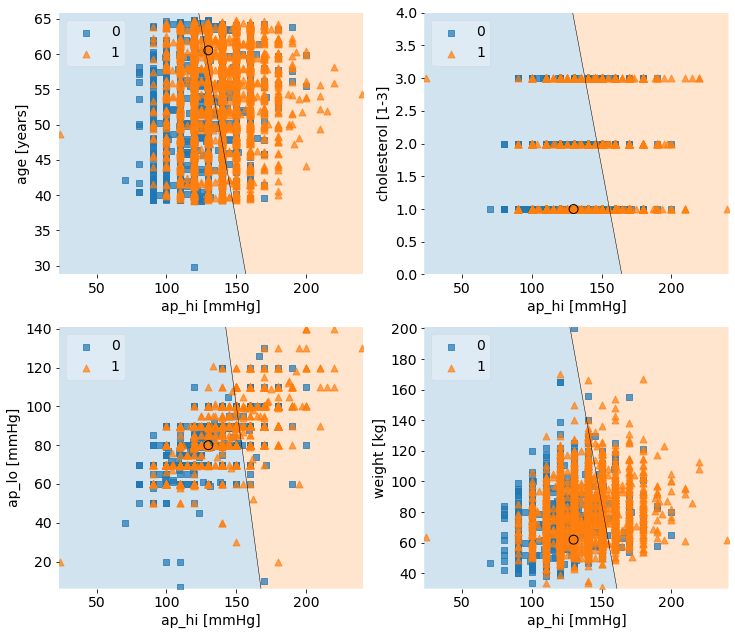

In [41]:
plt.rcParams.update({'font.size': 14})
fig, axarr = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=False)
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 1], ['ap_hi [mmHg]', 'age [years]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[0])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 7], ['ap_hi [mmHg]', 'cholesterol [1-3]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[1])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 6], ['ap_hi [mmHg]', 'ap_lo [mmHg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[2])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 4], ['ap_hi [mmHg]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[3])
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

## Apreciar lo que dificulta la interpretación del aprendizaje automático

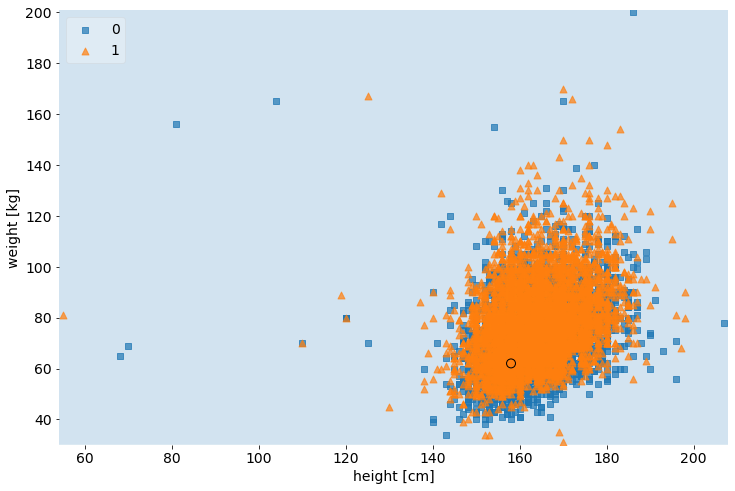

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X_test, y_test, log_result, [3, 4], ['height [cm]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=ax)
plt.show()

### Non-Linearity

In [43]:
X2 = cvd_df.drop(['cardio'], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"]/100)**2

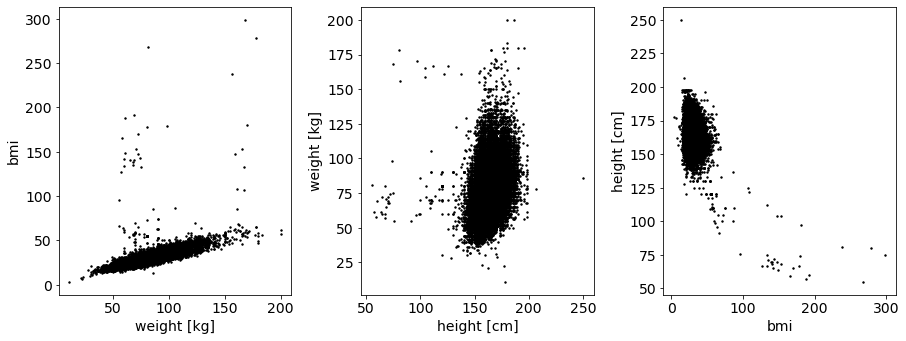

In [44]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
plt.rcParams.update({'font.size': 14})
axs[0].scatter(X2["weight"], X2["bmi"], color='black', s=2)
axs[0].set_xlabel('weight [kg]')
axs[0].set_ylabel('bmi')
axs[1].scatter(X2["height"], X2["weight"], color='black', s=2)
axs[1].set_xlabel('height [cm]')
axs[1].set_ylabel('weight [kg]')
axs[2].scatter(X2["bmi"], X2["height"], color='black', s=2)
axs[2].set_xlabel('bmi')
axs[2].set_ylabel('height [cm]')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

In [45]:
X2 = X2.drop(['weight','height'], axis=1)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=9)

In [46]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.562104
         Iterations 6


In [47]:
rand= 1234

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
y = cvd_df['age']
X = cvd_df.drop(['age'], axis=1).copy()
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.15, random_state=9)

In [50]:
reg_models = {
        #Generalized Linear Models (GLMs)
        'linear':{'model': linear_model.LinearRegression()}, 
        'linear_poly':{'model': make_pipeline(PolynomialFeatures(degree=2),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'linear_interact':{'model': make_pipeline(PolynomialFeatures(interaction_only=True),
                              linear_model.LinearRegression(fit_intercept=False)) },
        'ridge':{'model': linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]) }, 
        #Trees  
        'decision_tree':{'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)},
        #RuleFit
        'rulefit':{'model': RuleFit(max_rules=150, rfmode='regress', random_state=rand)}, 
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsRegressor(n_neighbors=7)}, 
        #Ensemble Methods
        'random_forest':{'model':ensemble.RandomForestRegressor(max_depth=7, random_state=rand)}, 
        #Neural Networks
        'mlp':{'model':neural_network.MLPRegressor(hidden_layer_sizes=(21,), max_iter=500, 
                                                   early_stopping=True, random_state=rand)}
    }

In [51]:
for model_name in reg_models.keys():
    if model_name != 'rulefit':
        fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
    else:
        fitted_model = reg_models[model_name]['model'].fit(X_train.values, y_train_reg.values, X_test.columns)
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    reg_models[model_name]['fitted'] = fitted_model
    reg_models[model_name]['preds'] = y_test_pred
    reg_models[model_name]['RMSE_train'] = math.sqrt(metrics.mean_squared_error(y_train_reg, y_train_pred))
    reg_models[model_name]['RMSE_test'] = math.sqrt(metrics.mean_squared_error(y_test_reg, y_test_pred))
    reg_models[model_name]['MAPE_train'] = mean_absolute_percentage_error(y_train_reg, y_train_pred)
    reg_models[model_name]['MAPE_test'] = mean_absolute_percentage_error(y_test_reg, y_test_pred)
    reg_models[model_name]['R2_test'] = metrics.r2_score(y_test_reg, y_test_pred)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 14571.063069797121, tolerance: 266.6978214121335


In [169]:
reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[['RMSE_train', 'RMSE_test', 'MAPE_train', 'MAPE_test','R2_test']]
reg_metrics.sort_values(by='MAPE_test').style.\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['RMSE_train', 'RMSE_test','MAPE_train', 'MAPE_test']).\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['R2_test'])

,RMSE_train,RMSE_test,MAPE_train,MAPE_test,R2_test
random_forest,0.017297,0.017413,10.234129,10.305776,0.114285
rulefit,0.017444,0.017445,10.321832,10.333090,0.110954
linear_poly,0.017455,0.017456,10.333306,10.337843,0.109806
decision_tree,0.017364,0.017490,10.261712,10.347581,0.106416
linear_interact,0.017486,0.017487,10.353406,10.362587,0.106692
linear,0.017660,0.017665,10.478798,10.512143,0.088429
ridge,0.017660,0.017665,10.478802,10.512146,0.088429
knn,0.016395,0.018639,9.568422,10.855034,-0.014884
mlp,0.029665,0.045302,12.703510,13.152144,-4.995313


In [52]:
rand = 9
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train_class , y_test_class  = train_test_split(X, y, test_size=0.15, random_state=rand)


In [53]:
class_models = {
        #Generalized Linear Models (GLMs)
        'logistic':{'model': linear_model.LogisticRegression()}, 
        'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1],\
                                                         class_weight='balanced')},  
        #Tree
        'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
        #Nearest Neighbors
        'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)}, 
        #Naive Bayes
        'naive_bayes':{'model': naive_bayes.GaussianNB()},
        #Ensemble Methods
        'gradient_boosting':{'model':ensemble.GradientBoostingClassifier(n_estimators=210)},
        'random_forest':{'model':ensemble.RandomForestClassifier(max_depth=11,\
                                                                 class_weight='balanced', random_state=rand)},
        #Neural Networks
        'mlp':{'model':make_pipeline(StandardScaler(),\
                                     neural_network.MLPClassifier(hidden_layer_sizes=(7,), max_iter=500,\
                                                   early_stopping=True, random_state=rand))}
    }

In [54]:
print(y_train_class[y_train_class==1].shape[0] / y_train_class.shape[0])

0.49614752414218205


In [55]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
    y_train_pred = fitted_model.predict(X_train.values)
    if model_name == 'ridge':
        y_test_pred = fitted_model.predict(X_test.values) 
    else:
        y_test_prob = fitted_model.predict_proba(X_test.values)[:,1]
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['probs'] = y_test_prob
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
    class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
    class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
    class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)
    if model_name != 'ridge':
        class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_prob)
    else:
        class_models[model_name]['ROC_AUC_test'] = 0
    class_models[model_name]['F1_test'] = metrics.f1_score(y_test_class, y_test_pred)
    class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [56]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                                               'Recall_train', 'Recall_test',\
                                                               'ROC_AUC_test', 'F1_test', 'MCC_test']]
class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.\
    background_gradient(cmap='plasma', low=0.3, high=1, subset=['Accuracy_train', 'Accuracy_test']).\
    background_gradient(cmap='viridis', low=1, high=0.3, subset=['Recall_train', 'Recall_test',\
                                                                 'ROC_AUC_test', 'F1_test', 'MCC_test'])

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,ROC_AUC_test,F1_test,MCC_test
gradient_boosting,0.739436,0.736102,0.700038,0.700698,0.804309,0.720968,0.471753
random_forest,0.761763,0.735908,0.713359,0.694118,0.803604,0.718918,0.471547
mlp,0.729145,0.733094,0.700521,0.710867,0.799146,0.721587,0.465582
decision_tree,0.735943,0.732027,0.685820,0.683549,0.794625,0.712830,0.464004
naive_bayes,0.710311,0.714660,0.604548,0.610768,0.781338,0.675637,0.433752
logistic,0.713684,0.719317,0.666460,0.676570,0.778697,0.701105,0.438220
knn,0.764622,0.703017,0.738931,0.672183,0.752542,0.687749,0.405295
ridge,0.725567,0.728049,0.660489,0.669392,0.000000,0.705474,0.456527


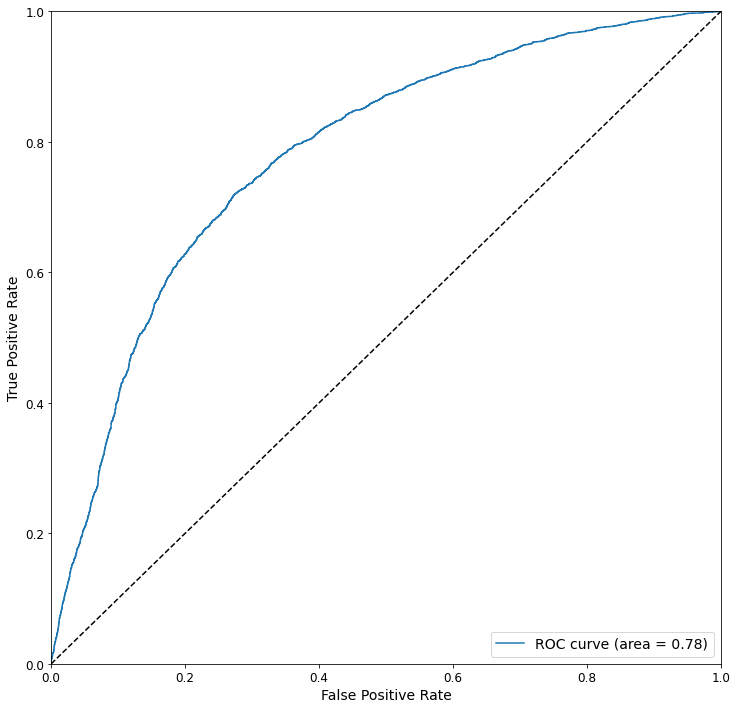

In [175]:
plt.figure(figsize = (12,12))
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
fpr, tpr, _ = metrics.roc_curve(y_test_class, class_models['naive_bayes']['probs'])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % class_models['naive_bayes']['ROC_AUC_test'])
plt.plot([0, 1], [0, 1], 'k--')  # coin toss line
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


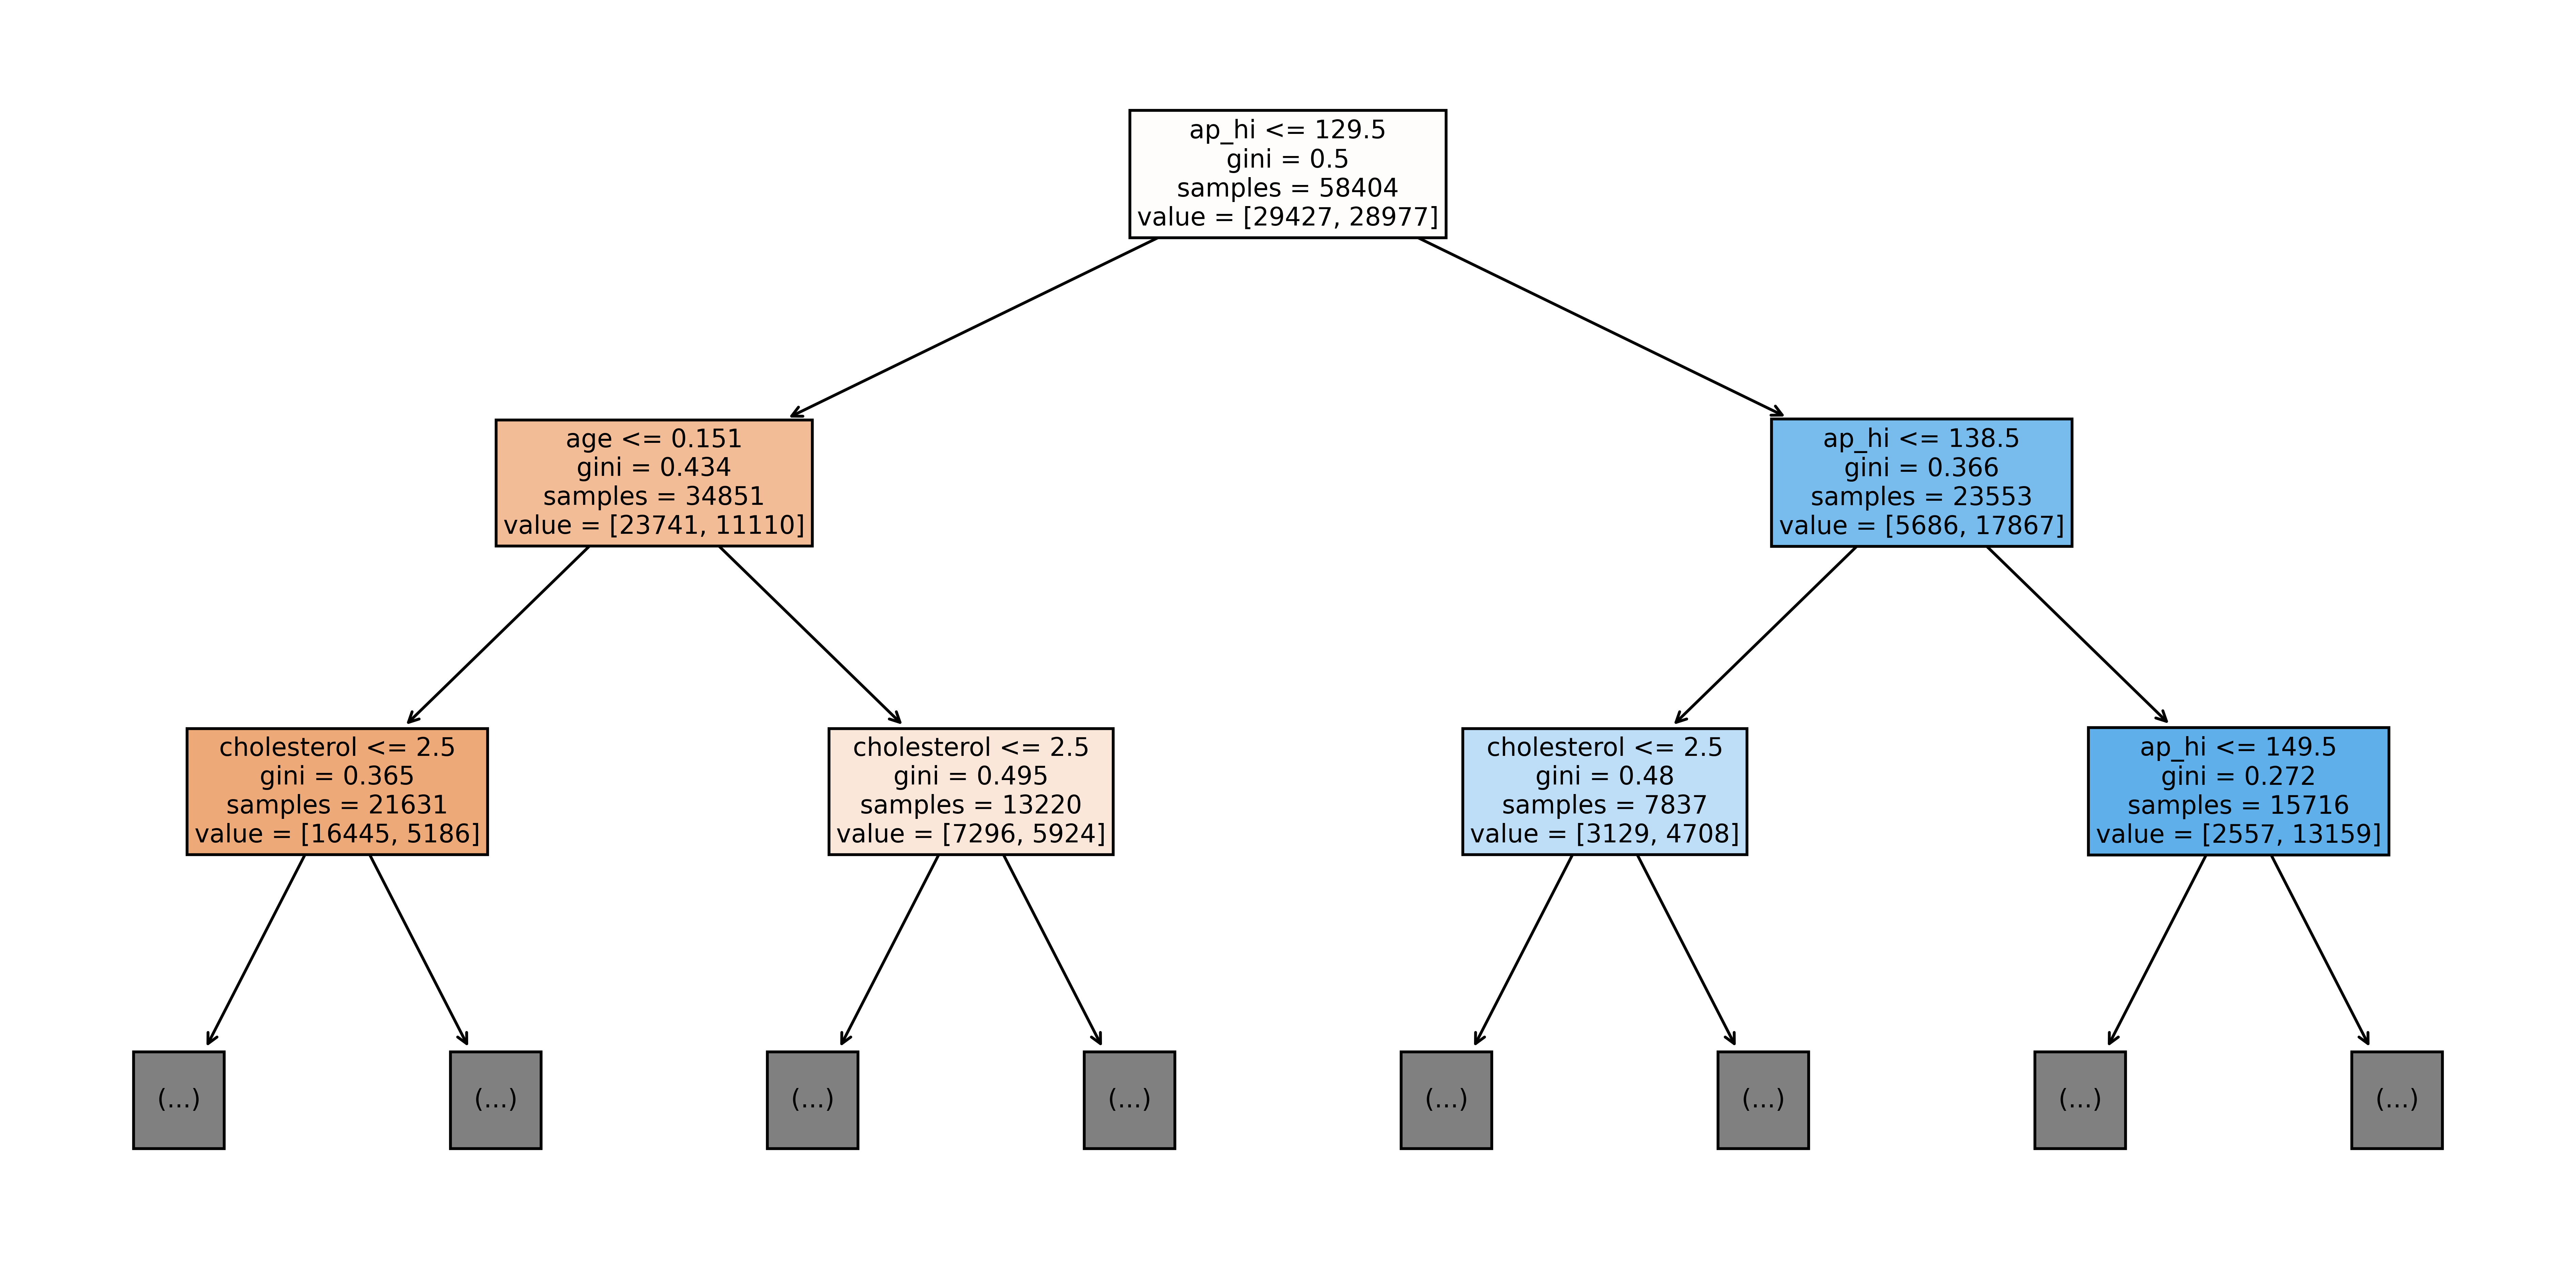

In [176]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi=600)
tree.plot_tree(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist(), filled = True, max_depth=2)
fig.show()

In [177]:
text_tree = tree.export_text(class_models['decision_tree']['fitted'],\
               feature_names=X_train.columns.values.tolist())
print(text_tree)

|--- ap_hi <= 129.50
|   |--- age <= 0.15
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 0.12
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- ap_hi <= 114.50
|   |   |   |   |   |   |--- gluc <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- gluc >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ap_hi >  114.50
|   |   |   |   |   |   |--- weight <= 129.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- weight >  129.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- ap_lo <= 86.50
|   |   |   |   |   |   |--- weight <= 81.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- weight >  81.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ap_lo >  86.50
|   |   |   |   |   |   |--- weight <= 68.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- weight >  68.50
| 

In [178]:
dt_imp_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),\
                        'importance': class_models['decision_tree']['fitted'].feature_importances_}).\
            sort_values(by='importance', ascending=False)
dt_imp_df

,feature,importance
4,ap_hi,0.748096
0,age,0.131561
6,cholesterol,0.073256
3,weight,0.018463
2,height,0.007164
5,ap_lo,0.006561
10,active,0.006381
7,gluc,0.006374
8,smoke,0.001778
1,gender,0.000366


In [179]:
rulefit_df = reg_models['rulefit']['fitted'].get_rules()
rulefit_df = rulefit_df[rulefit_df.coef != 0].sort_values(by="importance", ascending=False)
rulefit_df

,rule,type,coef,support,importance
28,height <= 184.5 & cardio > 0.5,rule,0.003514,0.491613,1.756532e-03
3,ap_hi,linear,0.000090,1.000000,1.357142e-03
1,height,linear,-0.000168,1.000000,1.249983e-03
4,ap_lo,linear,-0.000134,1.000000,1.204478e-03
52,cholesterol <= 2.5 & cardio > 0.5 & ap_hi > 117.5,rule,0.002227,0.343226,1.057213e-03
25,ap_hi <= 112.5 & cholesterol <= 2.5 & ap_hi <=...,rule,-0.002889,0.138710,9.987350e-04
65,cholesterol <= 2.5,rule,-0.002978,0.880000,9.678785e-04
32,ap_lo <= 80.5 & cardio <= 0.5,rule,-0.001683,0.437419,8.349860e-04
93,ap_hi <= 121.5 & ap_lo > 76.5,rule,0.001433,0.404516,7.031839e-04
36,cholesterol > 2.5 & cardio > 0.5,rule,0.002335,0.094194,6.821440e-04


## Modelos Grass-Box

In [181]:
ebm_mdl = ExplainableBoostingClassifier()
ebm_mdl.fit(X_train, y_train_class)

ExplainableBoostingClassifier(binning='quantile', early_stopping_rounds=50,
                              early_stopping_tolerance=0.0001,
                              feature_names=['age', 'gender', 'height',
                                             'weight', 'ap_hi', 'ap_lo',
                                             'cholesterol', 'gluc', 'smoke',
                                             'alco', 'active', 'age x ap_hi',
                                             'ap_hi x cholesterol',
                                             'age x ap_lo',
                                             'ap_lo x cholesterol',
                                             'ap_hi x gluc', 'weight x ap_hi',
                                             'age x cholesterol',
                                             'ap_lo x gluc', 'age x weight'...
                                             'categorical', 'interaction',
                                             'interaction', 'inter

In [182]:
show(ebm_mdl.explain_global())


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


<!-- http://127.0.0.1:7001/1840412093984/ -->

In [184]:
ebm_lcl = ebm_mdl.explain_local(X_test.iloc[76:77],\
                                y_test_class[76:77], name='EBM')
show(ebm_lcl)

<!-- http://127.0.0.1:7001/1840499349392/ -->

In [185]:
ebm_perf = ROC(ebm_mdl.predict_proba).\
                            explain_perf(X_test,\
                                         y_test_class, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/1840478416272/ -->

In [188]:
sr_mdl = SkopeRules(n_estimators=200, precision_min=0.2, recall_min=0.01,\
                    n_jobs=-1, random_state=rand, max_depth=7,\
                    feature_names=X_train.columns)
sr_mdl.fit(X_train, y_train_class)

SkopeRules(bootstrap=False, bootstrap_features=False,
           feature_names=Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object'),
           max_depth=7, max_depth_duplication=None, max_features=1.0,
           max_samples=0.8, max_samples_features=1.0, min_samples_split=2,
           n_estimators=200, n_jobs=-1, precision_min=0.2, random_state=9,
           recall_min=0.01, verbose=0)

In [190]:
sr_y_test_prob = sr_mdl.score_top_rules(X_test)
sr_y_test_pred = np.where(sr_y_test_prob > 0.5, 1, 0)

In [191]:
print(sr_mdl.decision_function(X_test.iloc[76:77]))

[14.35735676]


In [194]:
print(sr_mdl.rules_[0:5])

[('height > 140.5 and weight <= 116.5 and weight > 51.5 and ap_hi > 149.5 and ap_lo > 68.0', (0.8665848527349228, 0.21286766289134834, 2)), ('height > 140.5 and weight > 52.5 and ap_hi <= 184.5 and ap_hi > 149.5 and ap_lo > 64.0', (0.8690922061708578, 0.21041495746793903, 2)), ('weight > 42.5 and ap_hi <= 205.0 and ap_hi > 149.5 and ap_lo > 68.5 and gluc <= 2.5', (0.8702361033649377, 0.20169769045156843, 2)), ('weight > 52.5 and ap_hi > 149.5 and ap_lo > 68.5 and gluc <= 2.5', (0.8711243929772133, 0.20048143053645118, 2)), ('height > 140.5 and weight > 51.5 and ap_hi > 149.5 and ap_lo > 68.0 and gluc <= 2.5', (0.8696709050112191, 0.20048277943014786, 2))]


In [193]:
print('accuracy: %.3g, recall: %.3g, roc auc: %.3g, f1: %.3g, mcc: %.3g' %\
      (metrics.accuracy_score(y_test_class, sr_y_test_pred),\
       metrics.recall_score(y_test_class, sr_y_test_pred),\
       metrics.roc_auc_score(y_test_class, sr_y_test_prob),\
       metrics.f1_score(y_test_class, sr_y_test_pred),\
       metrics.matthews_corrcoef(y_test_class, sr_y_test_pred)))

accuracy: 0.545, recall: 0.961, roc auc: 0.692, f1: 0.673, mcc: 0.189
